*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containng both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*



---



For this challenge, you will complete the code below to classify images of dogs and cats. You will use Tensorflow 2.0 and Keras to create a convolutional neural network that correctly classifies images of cats and dogs at least 63% of the time. (Extra credit if you get it to 70% accuracy!)

Some of the code is given to you but some code you must fill in to complete this challenge. Read the instruction in each text cell so you will know what you have to do in each code cell.

The first code cell imports the required libraries. The second code cell downloads the data and sets key variables. The third cell is the first place you will write your own code.

The structure of the dataset files that are downloaded looks like this (You will notice that the test directory has no subdirectories and the images are not labeled):
```
cats_and_dogs
|__ train:
    |______ cats: [cat.0.jpg, cat.1.jpg ...]
    |______ dogs: [dog.0.jpg, dog.1.jpg ...]
|__ validation:
    |______ cats: [cat.2000.jpg, cat.2001.jpg ...]
    |______ dogs: [dog.2000.jpg, dog.2001.jpg ...]
|__ test: [1.jpg, 2.jpg ...]
```

You can tweak epochs and batch size if you like, but it is not required.

In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Now it is your turn! Set each of the variables below correctly. (They should no longer equal `None`.)

Create image generators for each of the three image data sets (train, validation, test). Use `ImageDataGenerator` to read / decode the images and convert them into floating point tensors. Use the `rescale` argument (and no other arguments for now) to rescale the tensors from values between 0 and 255 to values between 0 and 1.

For the `*_data_gen` variables, use the `flow_from_directory` method. Pass in the batch size, directory, target size (`(IMG_HEIGHT, IMG_WIDTH)`), class mode, and anything else required. `test_data_gen` will be the trickiest one. For `test_data_gen`, make sure to pass in `shuffle=False` to the `flow_from_directory` method. This will make sure the final predictions stay is in the order that our test expects. For `test_data_gen` it will also be helpful to observe the directory structure.


After you run the code, the output should look like this:
```
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.
```

In [4]:
%pwd
!ls cats_and_dogs/

test  train  validation


In [5]:
!ls cats_and_dogs/train/

cats  dogs


In [6]:
!ls cats_and_dogs/validation/

cats  dogs


In [7]:
!ls cats_and_dogs/test/

10.jpg	15.jpg	1.jpg	24.jpg	29.jpg	33.jpg	38.jpg	42.jpg	47.jpg	5.jpg
11.jpg	16.jpg	20.jpg	25.jpg	2.jpg	34.jpg	39.jpg	43.jpg	48.jpg	6.jpg
12.jpg	17.jpg	21.jpg	26.jpg	30.jpg	35.jpg	3.jpg	44.jpg	49.jpg	7.jpg
13.jpg	18.jpg	22.jpg	27.jpg	31.jpg	36.jpg	40.jpg	45.jpg	4.jpg	8.jpg
14.jpg	19.jpg	23.jpg	28.jpg	32.jpg	37.jpg	41.jpg	46.jpg	50.jpg	9.jpg


In [12]:
import os

# Walk through cat_and_dogs directory and list number of files
for dirpath, dirnames, filenames in os.walk("cats_and_dogs"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 1 images in 'cats_and_dogs'.
There are 0 directories and 51 images in 'cats_and_dogs/test'.
There are 2 directories and 1 images in 'cats_and_dogs/train'.
There are 0 directories and 1000 images in 'cats_and_dogs/train/cats'.
There are 0 directories and 1000 images in 'cats_and_dogs/train/dogs'.
There are 2 directories and 1 images in 'cats_and_dogs/validation'.
There are 0 directories and 500 images in 'cats_and_dogs/validation/cats'.
There are 0 directories and 500 images in 'cats_and_dogs/validation/dogs'.


Image shape: (768, 1023, 3)


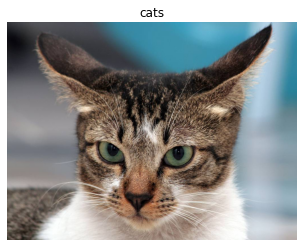

In [13]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

# View a random image from the training dataset
img = view_random_image(target_dir="cats_and_dogs/train/",
                        target_class="cats")

In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(123)

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_image_generator  = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator= ImageDataGenerator(rescale=1./255)
# Setup the train and test directories
train_dir = "cats_and_dogs/train/"
valid_dir = "cats_and_dogs/validation/"
test_dir=   "cats_and_dogs/test/"
# Import data from directories and turn it into batches
train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                               batch_size=batch_size, # number of images to process at a time 
                                               target_size=(IMG_HEIGHT,IMG_WIDTH ), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=123)

val_data_gen  = validation_image_generator.flow_from_directory(valid_dir,
                                               batch_size=32,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH ),
                                               class_mode="binary",
                                               seed=123)

test_data_gen = test_image_generator.flow_from_directory(test_dir,
                                               batch_size=1,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH),
                                              class_mode= 'binary',
                                              classes=['.'],
                                               shuffle=False,
                                               seed=123
                                               )

# train_image_generator = None
# validation_image_generator = None
# test_image_generator = None

# train_data_gen = None
# val_data_gen = None
# test_data_gen = None

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


The `plotImages` function will be used a few times to plot images. It takes an array of images and a probabilities list, although the probabilities list is optional. This code is given to you. If you created the `train_data_gen` variable correctly, then running the cell below will plot five random training images.

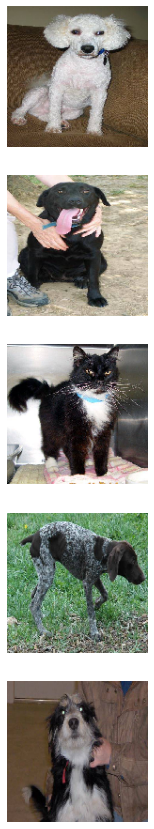

In [21]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


Recreate the `train_image_generator` using `ImageDataGenerator`. 

Since there are a small number of training examples there is a risk of overfitting. One way to fix this problem is by creating more training data from existing training examples by using random transformations.

Add 4-6 random transformations as arguments to `ImageDataGenerator`. Make sure to rescale the same as before.


In [27]:
# train_image_generator = None
# Create ImageDataGenerator training instance with data augmentation
train_image_generator = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

You don't have to do anything for the next cell. `train_data_gen` is created just like before but with the new `train_image_generator`. Then, a single image is plotted five different times using different variations.

Found 2000 images belonging to 2 classes.


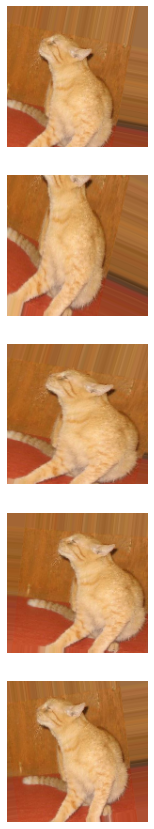

In [28]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In the cell below, create a model for the neural network that outputs class probabilities. It should use the Keras Sequential model. It will probably involve a stack of Conv2D and MaxPooling2D layers and then a fully connected layer on top that is activated by a ReLU activation function.

Compile the model passing the arguments to set the optimizer and loss. Also pass in `metrics=['accuracy']` to view training and validation accuracy for each training epoch.

In [55]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(150,150,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(1, activation="sigmoid"))
# model.add(Dense(10, activation="softmax"))

model.summary()


opt = Adam(lr=0.001)

model.compile(optimizer = opt , loss =tf.keras.losses.BinaryCrossentropy() , metrics = ['accuracy'])






Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 18, 18, 64)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Use the `fit` method on your `model` to train the network. Make sure to pass in arguments for `x`, `steps_per_epoch`, `epochs`, `validation_data`, and `validation_steps`.

In [56]:

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
history = model.fit(train_data_gen,epochs = 30 ,callbacks=[es] ,validation_data = val_data_gen )


Epoch 1/30
16/16 [==============================] - 85s 5s/step - loss: 0.6980 - accuracy: 0.5075 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 2/30
16/16 [==============================] - 83s 5s/step - loss: 0.6917 - accuracy: 0.5080 - val_loss: 0.6855 - val_accuracy: 0.5760
Epoch 3/30
16/16 [==============================] - 83s 5s/step - loss: 0.6895 - accuracy: 0.5220 - val_loss: 0.6820 - val_accuracy: 0.6080
Epoch 4/30
16/16 [==============================] - 82s 5s/step - loss: 0.6765 - accuracy: 0.5690 - val_loss: 0.6400 - val_accuracy: 0.6140
Epoch 5/30
16/16 [==============================] - 82s 5s/step - loss: 0.6698 - accuracy: 0.5825 - val_loss: 0.6298 - val_accuracy: 0.6590
Epoch 6/30
16/16 [==============================] - 82s 5s/step - loss: 0.6437 - accuracy: 0.6105 - val_loss: 0.6113 - val_accuracy: 0.6460
Epoch 7/30
16/16 [==============================] - 82s 5s/step - loss: 0.6274 - accuracy: 0.6400 - val_loss: 0.5898 - val_accuracy: 0.6740
Epoch 8/30
16/16 [==

Run the next cell to visualize the accuracy and loss of the model.

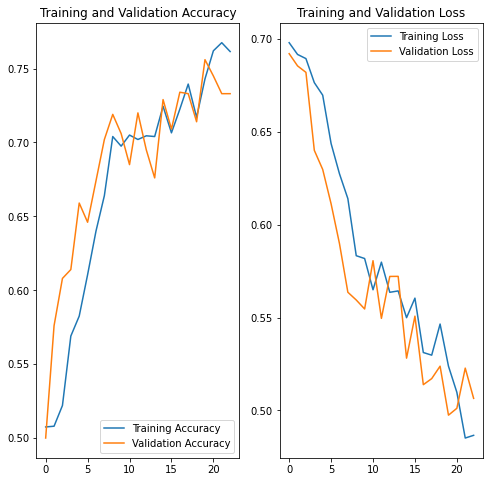

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(23)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Now it is time to use your model to predict whether a brand new image is a cat or a dog.

In this final cell, get the probability that each test image (from `test_data_gen`) is a dog or a cat. `probabilities` should be a list of integers. 

Call the `plotImages` function and pass in the test images and the probabilities corresponding to each test image.

After your run the cell, you should see all 50 test images with a label showing the percentage sure that the image is a cat or a dog. The accuracy will correspond to the accuracy shown in the graph above (after running the previous cell). More training images could lead to a higher accuracy.

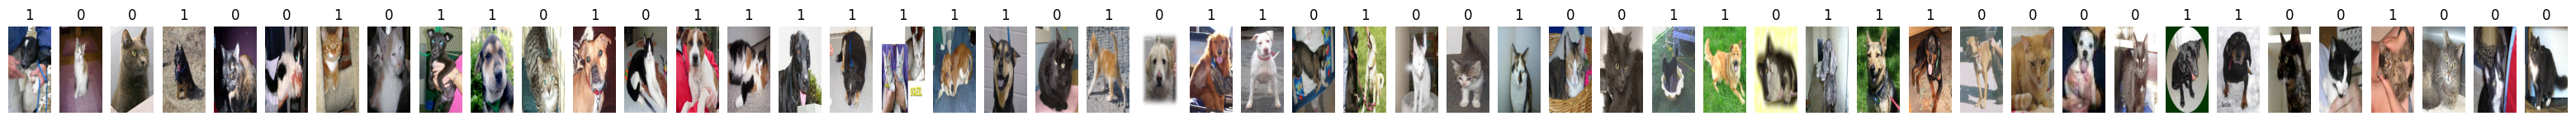

In [166]:
# img = keras.preprocessing.image.load_img(
#     "PetImages/Cat/6779.jpg", target_size=image_size
# )
# img_array = keras.preprocessing.image.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0)  # Create batch axis
import numpy as np
predictions = model.predict(test_data_gen)
score = predictions

# print(
#     "This image is %.2f percent cat and %.2f percent dog."
#     % (100 * (1 - score), 100 * score)
# 
proba=[]
for x in score:
  if x>=0.5:
    proba.append(1)
  else:
    proba.append(0)

# print(proba)
# proba[49]
# print(probabilities)
# plt.figure(figsize=(10, 10))
# for images in test_data_gen:
#     for i in range(51):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].np().astype("uint8"))
#         plt.title(int(labels[i]))
#         plt.axis("off")
f = plt.figure(figsize=(40,8))
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
for i in range(len(score)):

  # print(proba[i])
  # ax = plt.subplot(1,50,i + 1)
  
  nam2=test_data_gen.filenames[i]
  nam2=nam2.replace('./','')
  nam=test_dir+nam2
  img = mpimg.imread(nam)

  f.add_subplot(1, 50, i + 1)
  plt.imshow(img, extent=[-10, 10, -10, 10],aspect=2)
  plt.title(int(proba[i]))
  plt.axis("off")

Run this final cell to see if you passed the challenge or if you need to keep trying.

In [168]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(proba, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {round(percentage_identified, 2)*100}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 80.0% of the images of cats and dogs.
You passed the challenge!
